In [2]:
from tensorflow import keras

keras.utils.set_random_seed(42)

2024-10-30 11:25:47.791327: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Chuẩn bị dữ liệu

## Tải dữ liệu
Tải bộ dữ liệu MNIST từ keras sử dụng `keras.datasets.mnist.load_data` và chia thành hai tập train, test.

In [3]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()

Sử dụng thuộc tính `shape` để kiểm tra kích thước bộ dữ liệu train và test.\
Có bao nhiêu ảnh thuộc tập train và bao nhiêu ảnh thuộc tập test?

In [ ]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [5]:
Y_train.shape, Y_test.shape

((60000,), (10000,))

Để biểu diễn thử một ảnh từ bộ dữ liệu, ta sử dụng thư viện `PIL` và `matplotlib.pyplot`

In [6]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

Chọn ảnh đầu tiên trong tập `X_train` và vẽ ảnh bằng plt.\
Chọn tên của ảnh là label trong tập `Y_train` tương ứng với chỉ số của ảnh.

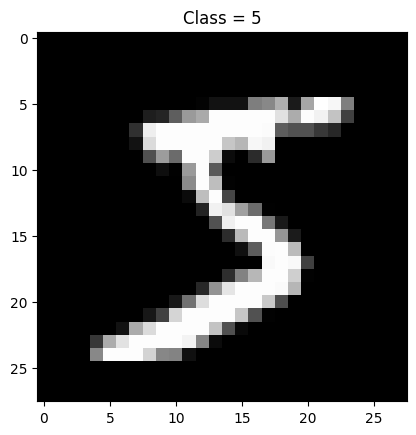

In [7]:
img = Image.fromarray(X_train[0])
plt.imshow(img, cmap='gray')
plt.title(f"Class = {Y_train[0]}")
plt.show()

## Biến đổi dữ liệu X
Để mô hình hoạt động hiệu quả hơn, nên scale khoảng giá trị của hình từ 0...255 thành 0...1

In [8]:
x_train = X_train.astype("float32") / 255
x_test = X_test.astype("float32") / 255

In [9]:
# Kiểm tra chiều của X
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

Ta cần đảm bảo dữ liệu x_train và x_test vào có format `(n, w, h, d)` để huấn luyện.

Trong đó:
* `n` là số hình
* `w` là chiều rộng
* `h` là chiều cao
* `d` là số chiều (ở bài tập này ta chọn d=1 vì hình trắng đen, nếu hình có màu RGB thì d=3)

Sử dụng `np.expand_dims()` để thêm chiều ở cuối.
> *Ví dụ: x_train có shape là `(60000, 28, 28)` cần phải được chuyển sang shape là `(60000, 28, 28, 1)`*


In [10]:
# Thêm chiều ở cuối
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Kiểm tra lại shape
print("x_train new shape:", x_train.shape)

x_train new shape: (60000, 28, 28, 1)


## Biến đổi dữ liệu Y

In [11]:
# Kiểm tra chiều của Y
Y_train.shape, Y_test.shape

((60000,), (10000,))

Cần chuyển kiểu dữ liệu của y_train và y_test từ dạng số (numerical) sang dạng phân loại (categorical).
> *Ví dụ: y_train có shape là (60000,) cần phải được chuyển sang shape mới là (60000, số_lớp)*

In [12]:
num_classes = 10  # từ 0 đến 9 là 10 loại (class)
y_train = keras.utils.to_categorical(Y_train, num_classes)
y_test = keras.utils.to_categorical(Y_test, num_classes)
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


# Mô hình CNN
## Xây dựng mô hình
Khai báo lại `input_shape` với kích thước đầu vào là `(h, w, d)` đã xác định.

In [13]:
input_shape = (28, 28, 1)   # Ảnh trắng đen nên có chiều là 1

model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3), input_shape=input_shape),    # Layer tích chập
    keras.layers.MaxPooling2D(pool_size=(2,2)),                              # Layer MaxPool luôn theo sau layer Conv
    keras.layers.Conv2D(64, kernel_size=(3, 3)),                             # Thêm layer tích chập để tăng độ phức tạp (học được nhiều thông tin hơn)
    keras.layers.MaxPooling2D(pool_size=(2,2)),                              # Layer MaxPool tương ứng
    keras.layers.Flatten(),                                                  # Chỉ có một layer flatten trong mô hình
    keras.layers.Dense(num_classes, activation='softmax'),                   # Layer phân loại
])

model.compile(optimizer='adam',
              loss="categorical_crossentropy",     # Thay đổi loss cho phù hợp với mục tiêu bài toán là phân loại
              metrics=['accuracy'])
              
model.summary()

/Users/ngfuong/MindX/CSI/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

## Huấn luyện mô hình
Huấn luyện mô hình với `batch_size=128` và `epochs=5`.
* `batch_size` là số ảnh được xử lý mỗi lần mô hình cập nhật
* `epochs` là số lần huấn luyện trên dữ liệu

Ta sử dụng thêm tham số `validation_split` để tách 10% từ tập train thành tập validation, đảm bảo mô hình không bị thiên kiến (biased) với dữ liệu tập train.

In [14]:
batch_size = 128
epochs = 5
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 25s 57ms/step - accuracy: 0.8347 - loss: 0.6079 - val_accuracy: 0.9768 - val_loss: 0.0847
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 24s 57ms/step - accuracy: 0.9724 - loss: 0.0924 - val_accuracy: 0.9820 - val_loss: 0.0615
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 24s 56ms/step - accuracy: 0.9807 - loss: 0.0636 - val_accuracy: 0.9820 - val_loss: 0.0565
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 24s 56ms/step - accuracy: 0.9840 - loss: 0.0519 - val_accuracy: 0.9837 - val_loss: 0.0548
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 24s 57ms/step - accuracy: 0.9870 - loss: 0.0447 - val_accuracy: 0.9853 - val_loss: 0.0538


# Đánh giá mô hình
Sử dụng phương thức `evaluate` để đánh giá mô hình trên tập test.\
Hàm sẽ trả về một tuple chứa giá trị loss và accuracy trên tập test.

In [15]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Test accuracy:", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9804 - loss: 0.0580
Test accuracy: 0.9846000075340271


# Dự đoán một hình
Lấy hình đầu tiên trong tập test và vẽ bằng matplotlib.

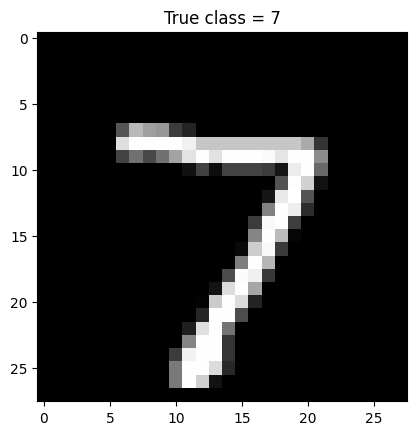

In [16]:
test_img = X_test[0]
img = Image.fromarray(test_img)
plt.imshow(img, cmap='gray')
plt.title(f"True class = {Y_test[0]}")
plt.show()

In [17]:
# Kiểm tra shape của hình
test_img.shape

(28, 28)

Vì layer Dense ở cuối có 10 units nên kết quả của `predict` cũng trả về một numpy array có 10 giá trị, mỗi giá trị là tỉ lệ mà hình thuộc lớp tương ứng.
> Ví dụ: Mô hình phân loại 4 lớp có kết quả predict là `[0.1, 0.2, 0.7, 0.0]` nghĩa là hình có 10% thuộc lớp thứ nhất, 20% thuộc lớp thứ hai, 70% thuộc lớp thứ ba và 0% thuộc lớp cuối cùng.

> Lưu ý: Tổng tất cả các tỉ lệ của mảng kết quả luôn bằng 1, tương ứng với 100%.

In [18]:
test_img = np.expand_dims(test_img, 0) # Thêm chiều n=1 để đảm bảo hình có đủ các chiều (n, h, w)
preds = model.predict(test_img)
preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

Sử dụng `np.argmax()` để lấy số thứ tự của lớp mà mô hình tự tin nhất.\
Ở đây số thứ tự vô tình trùng với tên của các lớp chữ số 0...9.

In [19]:
test_prediction  = np.argmax(preds)
print("Predicted class:", test_prediction)

Predicted class: 7
